In [5]:
import requests
from lxml import html
import lxml

In [16]:
categories = ['life','style','interviews','travel']

In [7]:
href = list()
titre = list()
auteurs = list()
nextpages = list()
categories_tab = list()
nextpage = ''

def extraction(category):
    global nextpage
    global href
    global titre
    global auteurs
    global nextpages
    global categories_tab
    print(category)
    if nextpage:
        r = requests.get(nextpage[0].xpath('.//@href')[0])
    else:
        r = requests.get('http://lachouquette.ch/category/'+category)
    tree = html.fromstring(r.content)
    
    # nouveau
    articles = tree.xpath('//article')
    for article in articles:
        lien = article.xpath('.//h3//a')[0]
        href.append(lien.xpath('.//@href')[0])
        titre.append(lien.xpath('.//text()')[0])
        categories_tab.append(category)
        auteur = article.xpath('.//span[@class="entry-meta"]//a//text()')
        if len(auteur):
            auteurs.append(auteur[0])
        else:
            auteurs.append('')
        if nextpage:
            nextpages.append(nextpage[0].xpath('.//@href')[0])
        else:
            nextpages.append('http://lachouquette.ch/category/'+category)
    nextpage =  tree.xpath('//section[@id="main"]//a[@class="next page-numbers"]')
    
def analyser(categories):
    global href
    global titre
    global auteurs
    global nextpage
    global nextpages
    global categories_tab
    
    href = list()
    titre = list()
    auteurs = list()
    nextpages = list()
    nextpage = ''
    
    for category in categories:
        extraction(category)
        while len(nextpage):
            extraction(category)

In [8]:
analyser(['travel'])

travel
travel


In [17]:
analyser(categories)

life
life
life
life
life
life
life
life
life
life
life
life
style
style
style
style
style
interviews
interviews
interviews
travel
travel


# Pandas part

In [32]:
import pandas as pd
import matplotlib

In [18]:
df = pd.DataFrame([auteurs,href,titre,nextpages,categories_tab]).transpose()

In [19]:
df.columns = ['Auteur','Lien','Titre','Category page','Categorie']

In [20]:
df['Auteur'].value_counts()

Cyrielle    130
Céline       62
Lucie        49
Justine      44
Béryl        18
             12
Aude         10
Laure         9
Caroline      8
Agnès         2
Thérèse       1
Name: Auteur, dtype: int64

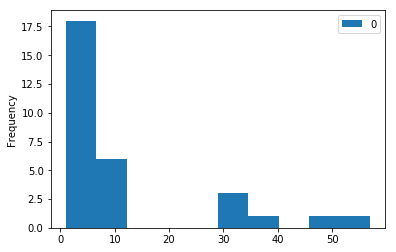

In [34]:
pd.DataFrame(df[['Categorie','Auteur']].groupby(['Auteur','Categorie']).size()).plot.hist()

# Améliorations
- ajout colonne de catégorie
- ajout de la date de publication
- ajout du nombre de commentaires
- ajout du nombre de partages
- analyseur de prix
- analyseur d'adresses
- enlever partie variables globales et jouer avec un return